In [1]:
import sys
import numpy
import matplotlib
import pandas
import sklearn

In [2]:
print('Python:{} '.format(sys.version))
print('Numpy:{} '.format(numpy.__version__))

Python:3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)] 
Numpy:1.14.3 


In [3]:
import numpy as np
from sklearn import preprocessing,cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report,accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd


C:\Users\RAMAN\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
#loading the dataset
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names=['id','a','b','c','d','e','f','g','h','i','class']
df=pd.read_csv(url,names=names)
df


,id,a,b,c,d,e,f,g,h,i,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [5]:
#preprocess the data
df.replace('?',-99999,inplace=True)
print(df.axes)
df.drop(['id'],1,inplace=True)

print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'class'], dtype='object')]
(699, 10)


In [6]:
#do dataset visualisation
print(df.loc[0:2])
print(df.describe())

   a  b  c  d  e   f  g  h  i  class
0  5  1  1  1  2   1  3  1  1      2
1  5  4  4  5  7  10  3  2  1      2
2  3  1  1  1  2   2  3  1  1      2
                a           b           c           d           e           g  \
count  699.000000  699.000000  699.000000  699.000000  699.000000  699.000000   
mean     4.417740    3.134478    3.207439    2.806867    3.216023    3.437768   
std      2.815741    3.051459    2.971913    2.855379    2.214300    2.438364   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      2.000000    1.000000    1.000000    1.000000    2.000000    2.000000   
50%      4.000000    1.000000    1.000000    1.000000    2.000000    3.000000   
75%      6.000000    5.000000    5.000000    4.000000    4.000000    5.000000   
max     10.000000   10.000000   10.000000   10.000000   10.000000   10.000000   

                h           i       class  
count  699.000000  699.000000  699.000000  
mean     2.866953    1.589413    2

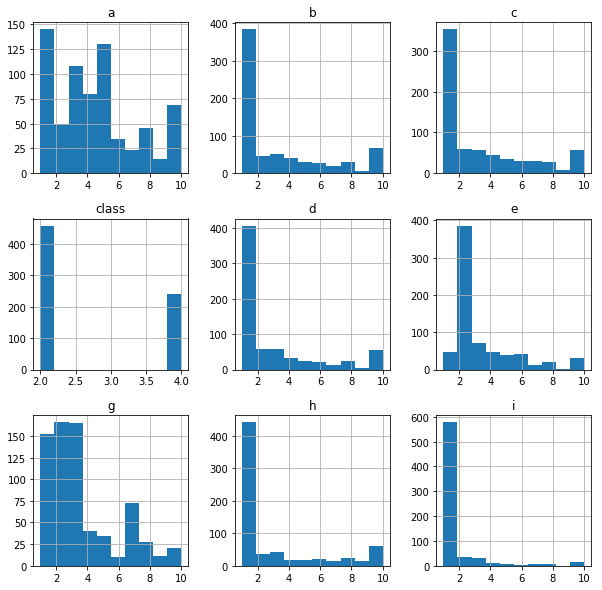

In [7]:
#plot histogram for each variable
df.hist(figsize=(10,10))
plt.show()

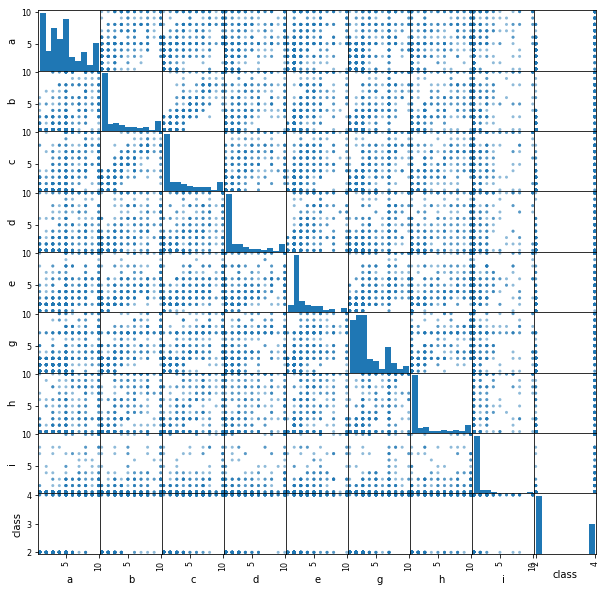

In [8]:
#create a scatter plot matrix
scatter_matrix(df,figsize=(10,10))
plt.show()

In [9]:
#create X and Y datasets for training 
X=np.array(df.drop(['class'],1))
y=np.array(df['class'])
X.shape
X_train,X_test,y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.2)

In [10]:
#specify testing options 
seed=8;
scoring='accuracy'

In [11]:
#Define the models to train
models=[]
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))

In [12]:
#evaluate each model in turn
results=[]
names=[]

for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

KNN:0.966006(0.016854)
SVM:0.955260(0.022978)


In [13]:
#make predictions
for name,model in models:
    model.fit(X_train,y_train)
    predicts=model.predict(X_test)
    print(name)
    print(accuracy_score(y_test,predicts))
    print(classification_report(y_test,predicts))

KNN
0.9785714285714285
             precision    recall  f1-score   support

          2       0.97      1.00      0.98        88
          4       1.00      0.94      0.97        52

avg / total       0.98      0.98      0.98       140

SVM
0.9571428571428572
             precision    recall  f1-score   support

          2       1.00      0.93      0.96        88
          4       0.90      1.00      0.95        52

avg / total       0.96      0.96      0.96       140



In [23]:
#final test
clf=SVC()
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print(accuracy)
example=np.array([[4,2,1,1,1,2,3,2,10]])
example=example.reshape(len(example),-1)
prediction=clf.predict(example)
if prediction
print(prediction)


0.9571428571428572
[4]
